In [146]:
import pandas as pd

## Load data from excel file

In [147]:
df = pd.read_excel('../data/Production Data Versaline.xlsx')
print(df.columns)
df.head(2)

Index(['Date', 'Product', 'Planned start Time', 'Actual Start Time',
       'Stop Time', 'Total time', 'Startup Delay',
       'Breakdowns and other delays', 'Effective production time',
       'Operating Speed', 'Produced Qty', 'Rejects Qty', 'Mix Usage',
       'Mix Wastage', 'Mix yield', 'AR', 'PR', 'QR', 'OEE', 'Mix Per Stick',
       'Efficiency', 'Planned Qty'],
      dtype='object')


,Date,Product,Planned start Time,Actual Start Time,Stop Time,Total time,Startup Delay,Breakdowns and other delays,Effective production time,Operating Speed,...,Mix Usage,Mix Wastage,Mix yield,AR,PR,QR,OEE,Mix Per Stick,Efficiency,Planned Qty
0,2018-07-02,WB Chocolate,06:30:00,10:30:00,20:30:00,14.0,4.0,5.15,4.85,28880,...,7840.0,991.000,0.873597,0.346429,1.496754,0.873597,0.452976,0.0375,0.499675,NaN
1,2018-07-04,WB Vanilla,06:00:00,18:30:00,20:00:00,14.0,12.5,0.00,1.50,28880,...,1160.0,40.625,0.964978,0.107143,0.716049,0.964978,0.074033,0.0375,0.098710,NaN


## Select only the useful features
remove duplicate features such as start time and end time

In [148]:
useful_colomns = ["Product", "Total time", "Breakdowns and other delays", "Effective production time", "Mix Usage", "Mix Wastage", "Mix yield", "Efficiency"]
df = df[useful_colomns]
df = df.rename(columns={"Breakdowns and other delays": "BD & other", "Effective production time": "Eff P time"})
df.head(2)

,Product,Total time,BD & other,Eff P time,Mix Usage,Mix Wastage,Mix yield,Efficiency
0,WB Chocolate,14.0,5.15,4.85,7840.0,991.000,0.873597,0.499675
1,WB Vanilla,14.0,0.00,1.50,1160.0,40.625,0.964978,0.098710


In [149]:
df.Product.unique()

array(['WB Chocolate', 'WB Vanilla', 'JJ Necto', 'MM Watermelon',
       'MM Orange', 'WB Chock Shock', 'WB Berry', '2-Bar Vanilla Faluda',
       'JJ Cream Soda', 'JJ Orange Crush ', 'Ice Cake', 'Bubble Gumy',
       'JJ Creamsoda', 'WB Vnilla', 'Bubble Gummy', 'Ice cake',
       'WB Chocok Shock', 'JJ Orange Crush'], dtype=object)

## Rename Duplicates products with the correct name

In [150]:
df = df.replace({'Product': {"JJ Orange Crush ": "JJ Orange Crush", 
                             "WB Chocok Shock": "WB Chock Shock",
                            "Ice cake": "Ice Cake",
                            "Bubble Gumy":"Bubble Gummy", 
                            "WB Vnilla": "WB Vanilla",
                            "JJ Creamsoda": "JJ Cream Soda"}})
for product in df.Product.unique():
    print("{:15} = {}".format(product, df[df["Product"] == product]["Product"].count()))

WB Chocolate    = 62
WB Vanilla      = 74
JJ Necto        = 45
MM Watermelon   = 51
MM Orange       = 65
WB Chock Shock  = 30
WB Berry        = 16
2-Bar Vanilla Faluda = 65
JJ Cream Soda   = 15
JJ Orange Crush = 8
Ice Cake        = 5
Bubble Gummy    = 5


In [151]:
print("Number of rows: {}".format(df.Product.count()))
df.info()

Number of rows: 441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      441 non-null    object 
 1   Total time   441 non-null    float64
 2   BD & other   441 non-null    float64
 3   Eff P time   441 non-null    float64
 4   Mix Usage    441 non-null    float64
 5   Mix Wastage  441 non-null    float64
 6   Mix yield    439 non-null    float64
 7   Efficiency   441 non-null    float64
dtypes: float64(7), object(1)
memory usage: 27.7+ KB


## Fill the NAN values with the mean of the colomn

In [176]:
# df["Rejects Qty"] = df["Rejects Qty"].fillna(df["Rejects Qty"].mean())
df["Mix yield"] = df["Mix yield"].fillna(df["Mix yield"].mean())
# df.info()

In [155]:
group_by_products = df.groupby(by=['Product'])
product_data_avg = group_by_products.mean()
product_data_count = group_by_products.count()
print(product_data_avg)
# print(product_data_count)

                      Total time  BD & other  Eff P time     Mix Usage  \
Product                                                                  
2-Bar Vanilla Faluda   17.371026    2.438631   12.829318  10112.923077   
Bubble Gummy           15.490000    2.893333   10.730000   9640.000000   
Ice Cake               16.266667    1.793333   11.906667  10480.000000   
JJ Cream Soda          13.906667    1.307704   11.215630  17380.000000   
JJ Necto               14.983778    2.029938   11.472654  16923.333333   
JJ Orange Crush        11.882083    2.665833    7.645417  11547.500000   
MM Orange              15.938000    1.973353   12.191570  14695.138462   
MM Watermelon          15.161111    2.273489   11.373570  13160.627451   
WB Berry               14.286458    1.870833    8.961458   6205.625000   
WB Chock Shock         17.102778    2.486778   10.413222   6784.166667   
WB Chocolate           13.962634    1.657430   10.293107   9279.032258   
WB Vanilla             14.352883    2.

## Some plots using seaboarn
https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
    

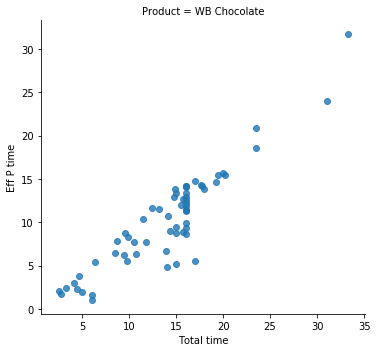

In [167]:
import seaborn as sns
%matplotlib inline

filtered_class = df[df['Product'] == 'WB Chocolate']
sns.lmplot("Total time", "Eff P time", data=filtered_class, fit_reg=False, col='Product', col_wrap=2)

frames = [df[df["Mix yield"].isna()], df[df["Rejects Qty"].isna()]]
pd.concat(frames)

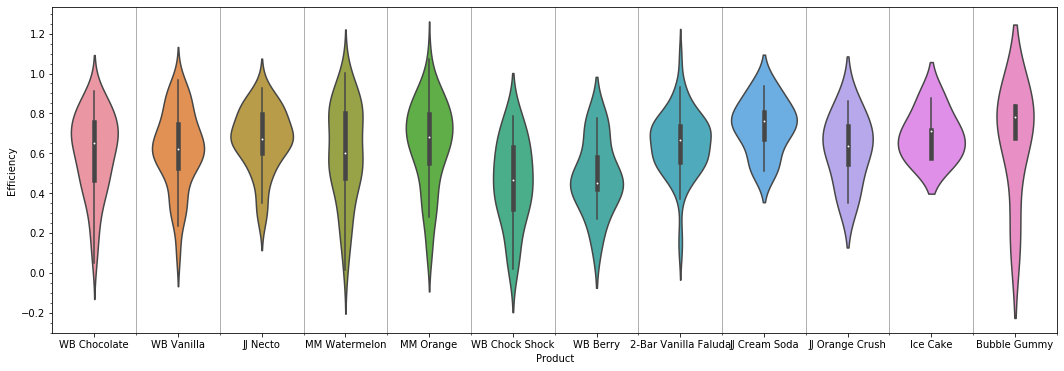

In [173]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,6))

ax1 = sns.violinplot('Product', "Efficiency", data=df)


ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

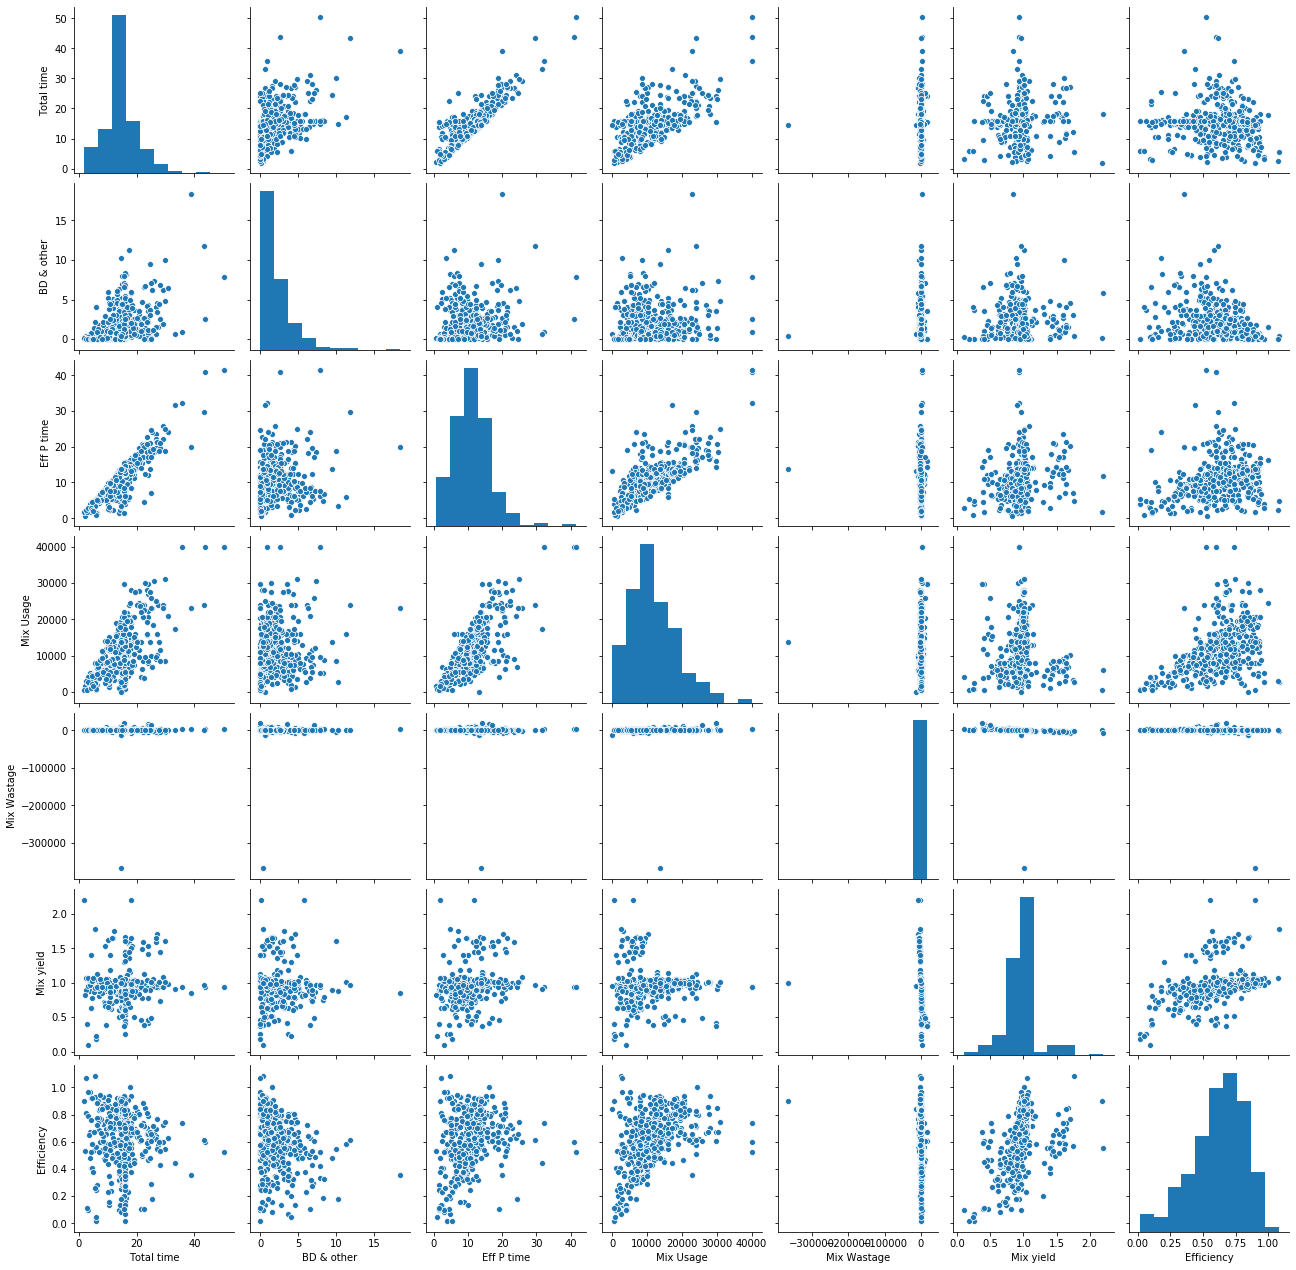

In [174]:
sns.pairplot(df.loc[:,df.dtypes == 'float64'])

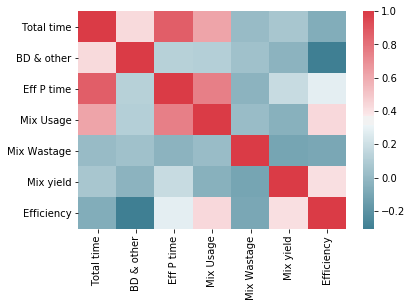

In [175]:
corr = df.loc[:,df.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [93]:
for col in df.columns.values:
    print("{:20} = {}".format(col, df[col].nunique()))

Date                 = 390
Product              = 18
Planned start Time   = 151
Actual Start Time    = 224
Stop Time            = 218
Total time           = 208
Startup Delay        = 130
Breakdowns and other delays = 261
Effective production time = 386
Operating Speed      = 5
Produced Qty         = 433
Rejects Qty          = 296
Mix Usage            = 253
Mix Wastage          = 435
Mix yield            = 438
AR                   = 431
PR                   = 436
QR                   = 300
OEE                  = 439
Mix Per Stick        = 7
Efficiency           = 441
Planned Qty          = 47
